# MACD Jupyter Notebook for Data Visualization

<br />
A visualization of the MACD technical indicator using 1 month of stock data from Amazon, Apple, and Google. Note that we use 15 minute candles. Slow, fast, signal moving averages are 26 days, 12 days, and 9 days respectively.

<br /><br/>
Below you will find the Python script and data visualizations:
<br /><br/>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


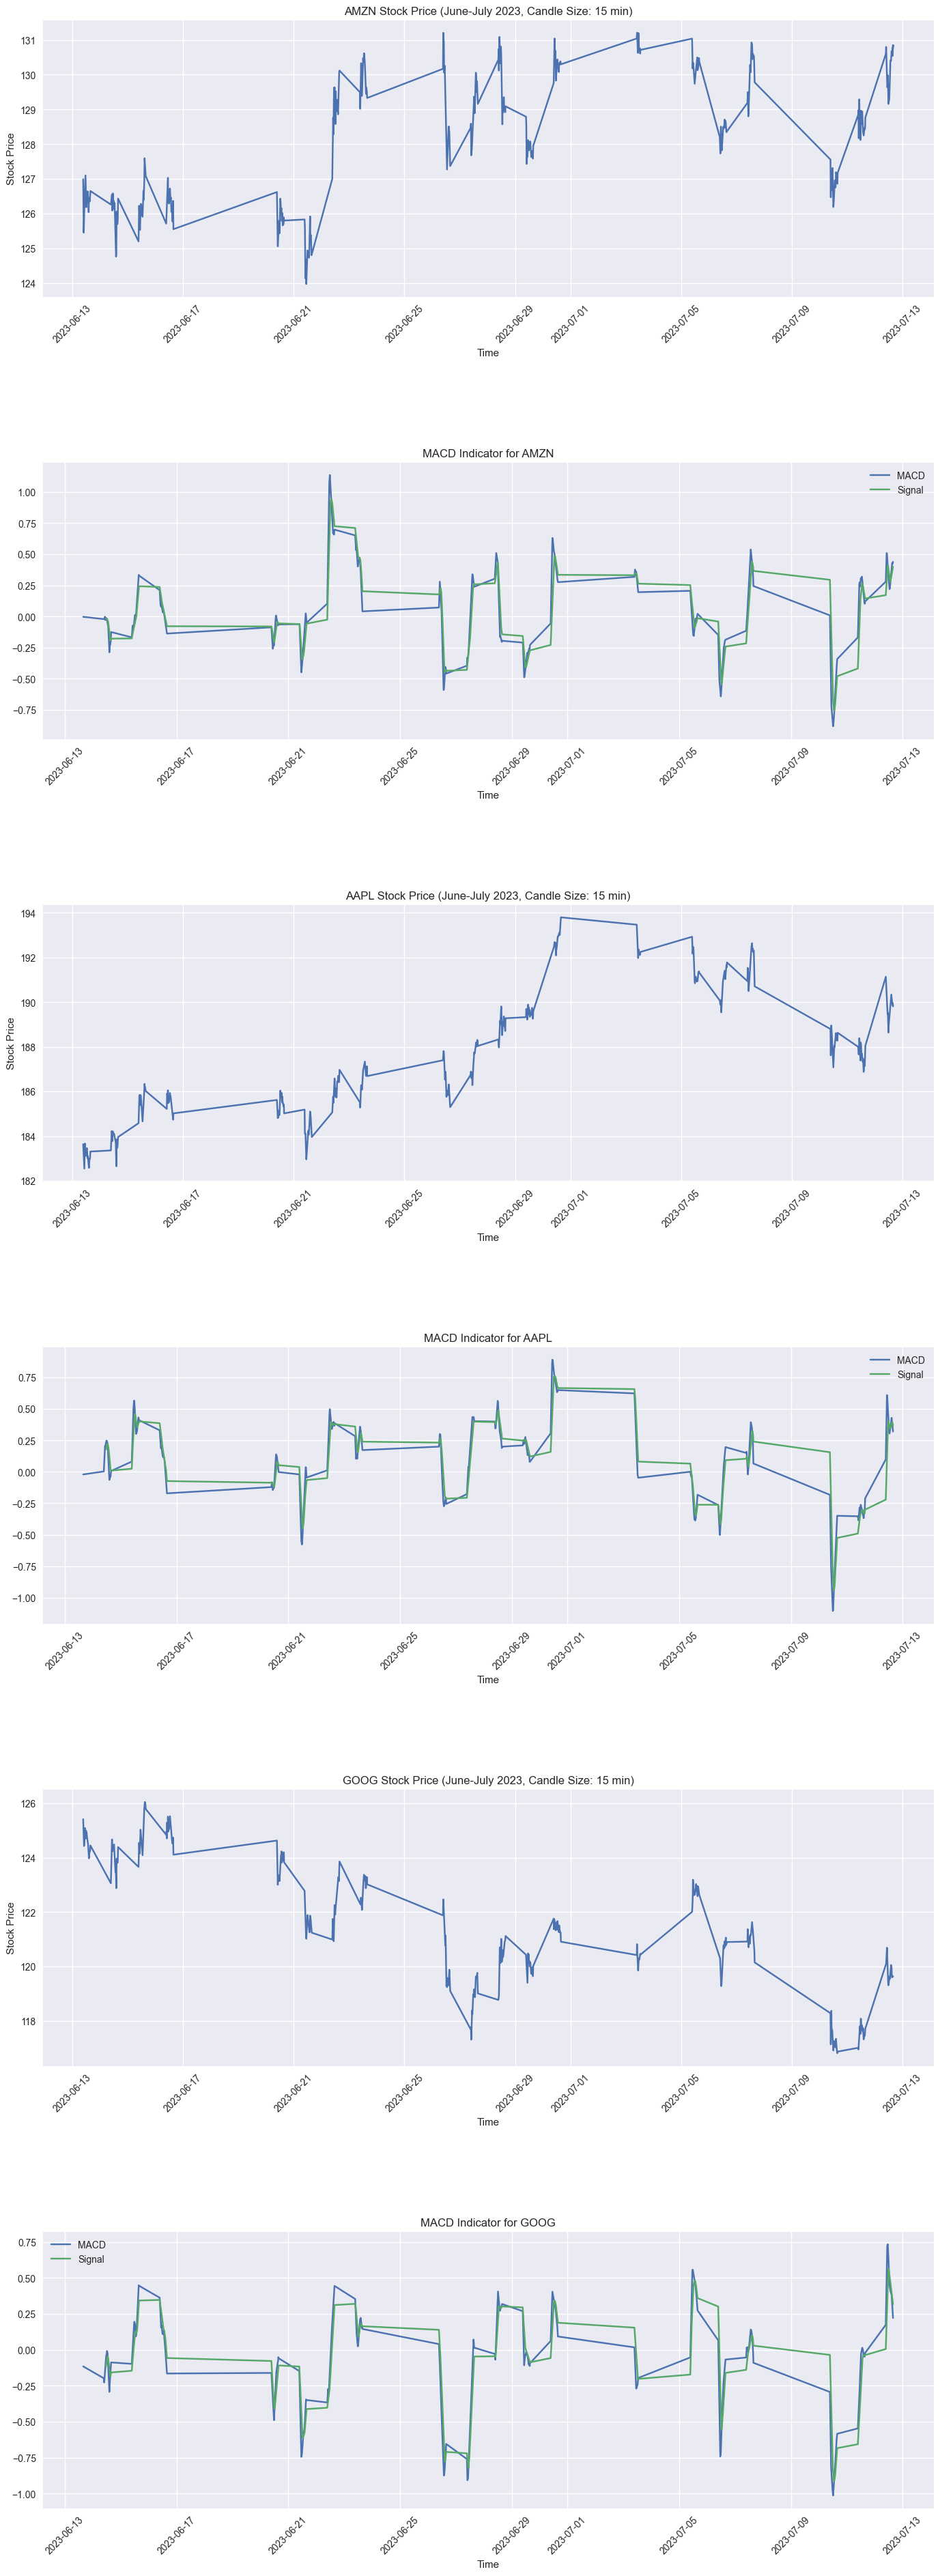

In [71]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

# ADD_MACD_COLUMNS - adds columns to DataFrame df regarding MACD. Takes in 3 more
#   parameters, moving average spans for slow, fast, and signal.
def add_macd_columns(df, slow, fast, signal):
    df_copy = df.copy()
    df_copy['Fast MA'] = df_copy['Adj Close'].ewm(span=fast, min_periods=fast).mean()
    df_copy['Slow MA'] = df_copy['Adj Close'].ewm(span=slow, min_periods=slow).mean()
    df_copy['MACD'] = df_copy['Fast MA'] - df_copy['Slow MA']
    df_copy['Signal'] = df_copy['MACD'].ewm(span=signal, min_periods=signal).mean()

    return df_copy.loc[:,['MACD', 'Signal']]

# Download historical data for various stocks
tickers = ['AMZN', 'AAPL', 'GOOG']
stock_data = {}

for t in tickers:
    data = yf.download(t, period='1mo', interval='15m') # 15 minute candles
    data.dropna(how='any', inplace=True)
    stock_data[t] = data

# Add the MACD columns to each stock's DataFrame
for stock in stock_data:
    stock_data[stock][['MACD', 'Signal']] = add_macd_columns(stock_data[stock], 26, 12, 9)


%matplotlib inline

# Initialize the Matplotlib plot
fig = plt.figure(figsize=(15, 45))
gs = gridspec.GridSpec(6, 1, figure=fig)
style.use('seaborn-v0_8')

# Add subplots for all graphs, using gridspec to properly set spacing
ax1 = fig.add_subplot(gs[0:1])
ax1a = fig.add_subplot(gs[1:2])
ax2 = fig.add_subplot(gs[2:3])
ax2a = fig.add_subplot(gs[3:4])
ax3 = fig.add_subplot(gs[4:5])
ax3a = fig.add_subplot(gs[5:6])

# AMZN Generic Stock Price
ax1.set(title="AMZN Stock Price (June-July 2023, Candle Size: 15 min)", xlabel="Time", ylabel="Stock Price")
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Close'], label='Close')
ax1.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for AMZN
ax1a.set(title="MACD Indicator for AMZN", xlabel="Time")
ax1a.plot(stock_data['AMZN'].index, stock_data['AMZN']['MACD'], label='MACD')
ax1a.plot(stock_data['AMZN'].index, stock_data['AMZN']['Signal'], label='Signal')
ax1a.tick_params(axis='x', rotation=45)
ax1a.legend()

# AAPL Generic Stock Price
ax2.set(title='AAPL Stock Price (June-July 2023, Candle Size: 15 min)', xlabel='Time', ylabel='Stock Price')
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'])
ax2.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for AAPL
ax2a.set(title="MACD Indicator for AAPL", xlabel="Time")
ax2a.plot(stock_data['AAPL'].index, stock_data['AAPL']['MACD'], label='MACD')
ax2a.plot(stock_data['AAPL'].index, stock_data['AAPL']['Signal'], label='Signal')
ax2a.tick_params(axis='x', rotation=45)
ax2a.legend()

# GOOG Generic Stock Price
ax3.set(title='GOOG Stock Price (June-July 2023, Candle Size: 15 min)', xlabel='Time', ylabel='Stock Price')
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Close'])
ax3.tick_params(axis='x', rotation=45)

# MACD Technical Indicator Graph for GOOG
ax3a.set(title="MACD Indicator for GOOG", xlabel="Time")
ax3a.plot(stock_data['GOOG'].index, stock_data['GOOG']['MACD'], label='MACD')
ax3a.plot(stock_data['GOOG'].index, stock_data['GOOG']['Signal'], label='Signal')
ax3a.tick_params(axis='x', rotation=45)
ax3a.legend()

gs.update(hspace=0.6)  # Adjust the hspace value to increase or decrease vertical spacing

plt.show()
